Download and extract the data from dropbox to train the model 

In [ ]:
!wget -O data https://www.dropbox.com/sh/8csdh3hda94986n/AAAaAWXAiIEbiBY3ZcRWtHYra?dl=0
!ls -l
!unzip -n -q -d data_extracted data
!rm data ; mv data_extracted data
# !ls -l ; ls -l data

--2023-04-18 19:18:17--  https://www.dropbox.com/sh/8csdh3hda94986n/AAAaAWXAiIEbiBY3ZcRWtHYra?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/8csdh3hda94986n/AAAaAWXAiIEbiBY3ZcRWtHYra [following]
--2023-04-18 19:18:17--  https://www.dropbox.com/sh/raw/8csdh3hda94986n/AAAaAWXAiIEbiBY3ZcRWtHYra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5fe04f2e379859eb1d9281359b.dl.dropboxusercontent.com/zip_download_get/Bd1Nbqg5iYeq2bOOh-Bz9_vHuryKfjAyhLxyziUacr3Ys_acKCa7EAHGP6jnhT3gKbU325ZKsEpCMssRzBftfJrB3V8hdW959briZUVNAdh0NA# [following]
--2023-04-18 19:18:19--  https://uc5fe04f2e379859eb1d9281359b.dl.dropboxusercontent.com/zip_download_get/Bd1Nbqg5iYeq2bOOh-Bz9_vHuryKfjAyhLxyziUacr3Ys_acKCa7EAHGP6jnhT3gKbU325ZKsEpCMssRzBftfJrB3

Create appropriate folders to store the augmented images

In [ ]:
!ls -latr data/license | wc -l
!ls -latr data/check | wc -l
!ls -latr data/other | wc -l
!mkdir -p data/flipped
!mkdir -p data/rotated
!mkdir -p data/vertFlipped
!mkdir -p data/
!ls -latr data

503
503
503
total 140
drwxr--r-- 2 root root 36864 Nov 11 16:19 license
drwxr--r-- 2 root root 36864 Nov 11 16:20 check
drwxr--r-- 2 root root 36864 Nov 11 16:27 other
drwxr-xr-x 1 root root  4096 Apr 18 19:18 ..
drwxr-xr-x 2 root root  4096 Apr 18 19:19 flipped
drwxr-xr-x 2 root root  4096 Apr 18 19:19 rotated
drwxr-xr-x 2 root root  4096 Apr 18 19:19 vertFlipped
drwxr-xr-x 8 root root  4096 Apr 18 19:19 .


https://www.tensorflow.org/tutorials/images/data_augmentation --> For data augmentation using keras

Perform Image augmentation to compendsate for lack of labelled images to train the model on

In [ ]:
import imgaug.augmenters as iaa
import cv2
import glob
from google.colab.patches import cv2_imshow

images = []
image_paths = glob.glob("data/*")
# images_path = glob.glob("data/license/*.jpg")

# Image flipper
flip = iaa.Sequential([
    iaa.Fliplr(1)
])

# Image rotater
rotate = iaa.Sequential([
    iaa.Rotate((-30, 30))
])

# Image vertical flipper
vertFlip = iaa.Sequential([
    iaa.Flipud(1)
])


# Iterate through all the images
for image_class_path in image_paths:
  # print("Image class path = ", image_class_path)
  image_path = glob.glob(image_class_path + "/*")
  for img_path in image_path:
    sub_directory = img_path.split("/")[1]
    image_name = img_path.split("/")[2]
    # print("Image name is: ", image_name)
    img = cv2.imread(img_path)
    images.append(img)

    flipped_image = flip(image=img)
    rotated_image = rotate(image=img)
    vertFlipped_image = vertFlip(image=img)

    cv2.imwrite('data/' + sub_directory + '/flipped_' + image_name , flipped_image)
    cv2.imwrite('data/' + sub_directory + '/rotated_' + image_name , rotated_image)
    cv2.imwrite('data/' + sub_directory + '/vertFlipped_' + image_name , vertFlipped_image)

    # print("Written to disk")

Ensure that the same number of images are in each class

In [ ]:
!ls -l data/check | wc -l
!ls -l data/license | wc -l
!ls -l data/other | wc -l

2001
2001
2001


Train the model to classify images into 3 classes: checks, licenses and others. The model will use the newly augmented and original images to learn what characteristics it can use to classify a particular image

(6000, 128, 128, 1)
(6000,)
X.shape[1:] is  (128, 128, 1)
Epoch 1/50
338/338 [==============================] - 16s 13ms/step - loss: 0.7069 - accuracy: 0.6815 - val_loss: 0.4188 - val_accuracy: 0.8600
Epoch 2/50
338/338 [==============================] - 4s 11ms/step - loss: 0.3803 - accuracy: 0.8620 - val_loss: 0.2712 - val_accuracy: 0.8983
Epoch 3/50
338/338 [==============================] - 4s 12ms/step - loss: 0.2609 - accuracy: 0.9033 - val_loss: 0.2265 - val_accuracy: 0.9150
Epoch 4/50
338/338 [==============================] - 4s 11ms/step - loss: 0.1677 - accuracy: 0.9407 - val_loss: 0.1903 - val_accuracy: 0.9267
Epoch 5/50
338/338 [==============================] - 4s 11ms/step - loss: 0.1500 - accuracy: 0.9431 - val_loss: 0.3512 - val_accuracy: 0.8900
Epoch 6/50
338/338 [==============================] - 4s 12ms/step - loss: 0.0942 - accuracy: 0.9663 - val_loss: 0.2221 - val_accuracy: 0.9283
Epoch 7/50
338/338 [==============================] - 4s 11ms/step - loss: 0.0652 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


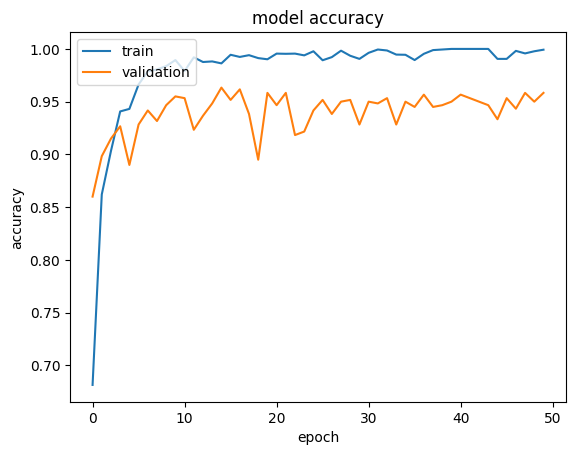

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

file_list = []
class_list = []
DATADIR = "data"

# All the categories you want your neural network to detect
CATEGORIES = ["check", "license", "other"]

# The size of the images that your neural network will use
IMG_SIZE = 128

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print(X.shape)
print(y.shape)

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

print("X.shape[1:] is ", X.shape[1:])

# Building the model
model = Sequential()
# 4 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 3 neurons, for 3 classes
model.add(Dense(3))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=16, epochs=50, validation_split=0.1)

# Saving the model

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Create a confusion matrix to show how well the model performed

In [ ]:
# Testing on train data
y_pred = model.predict(X)
y_pred_class = np.argmax(y_pred,axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred_class)

188/188 [==============================] - 1s 5ms/step


array([[1997,    2,    1],
       [   3, 1992,    5],
       [   4,    1, 1995]])

An Example of what an image may look like to the classifier

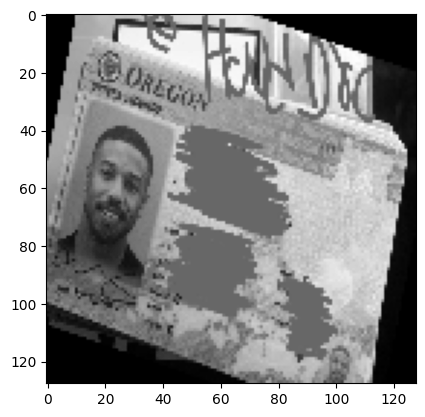

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X[19],cmap='gray')

Download the images to be classified

In [ ]:
!ls -l
!wget -O testing_data 'https://www.dropbox.com/s/7qdzisbauf1sxuq/october%201st%20-%2031st.zip?dl=0'
# !wget -O testing_data 'https://www.dropbox.com/s/tpk9uw8aoxtdkrc/November%201st%20-%2031st.zip?dl=0'
!ls -l 
!unzip -n -q -d testing_data_extracted testing_data
!echo "Done!"

total 12
drwxr-xr-x 4 root root 4096 Apr 18 19:26 CNN.model
drwxr-xr-x 8 root root 4096 Apr 18 19:19 data
drwxr-xr-x 1 root root 4096 Apr 14 13:35 sample_data
--2023-04-18 19:54:58--  https://www.dropbox.com/s/7qdzisbauf1sxuq/october%201st%20-%2031st.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7qdzisbauf1sxuq/october%201st%20-%2031st.zip [following]
--2023-04-18 19:54:59--  https://www.dropbox.com/s/raw/7qdzisbauf1sxuq/october%201st%20-%2031st.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8dc31757925abf0202012a7725.dl.dropboxusercontent.com/cd/0/inline/B6aOrNwfGws7VXI-O-i9W7bcXxfGcb2k9gJ-Y5L35MYx-xvChwspOqJixM0yQ8UoUypPzqxw9WqIxLvK1M12wDfAFt95lFQ5OsQHNvMGh-CqQnj5NjM5Tn5y34ypWzY1Q13CuV04l97MwyXJ4XTPSfny6eshQ8

Create folders to store the sorted images

In [ ]:
!rm -rf sorted_others
!rm -rf sorted_checks
!rm -rf sorted_licenses
!mkdir sorted_checks
!mkdir sorted_licenses
!mkdir sorted_others
!ls -l

total 2824828
drwxr-xr-x 4 root root       4096 Apr 18 19:26 CNN.model
drwxr-xr-x 8 root root       4096 Apr 18 19:19 data
drwxr-xr-x 1 root root       4096 Apr 14 13:35 sample_data
drwxr-xr-x 2 root root       4096 Apr 18 20:00 sorted_checks
drwxr-xr-x 2 root root       4096 Apr 18 20:00 sorted_licenses
drwxr-xr-x 2 root root       4096 Apr 18 20:00 sorted_others
-rw-r--r-- 1 root root 2892590727 Apr 18 19:59 testing_data
drwxr-xr-x 3 root root       4096 Apr 18 19:59 testing_data_extracted


array([[1.1739537e-02, 9.8765326e-01, 6.0729543e-04]], dtype=float32)

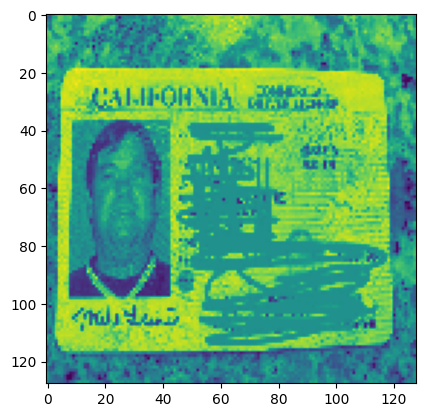

In [ ]:
img = prepare("/content/data/license/photo_10134@19-04-2022_17-51-04.jpg")
img = img/255.0
plt.imshow(img[0,:,:,0])
model.predict(img, verbose=0)

Run the classifier on our unsorted data

In [ ]:
import os
import cv2
import tensorflow as tf



CATEGORIES = ["check", "license", "other"]
            
def prepare(file):
    IMG_SIZE = 128
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array = new_array/255.0
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for dir, dirs, files in os.walk("testing_data_extracted", topdown=True):
  for name in files:
    image = os.path.join(dir, name)
    if image[-3:]=="jpg" or image[-4:] == "jpeg" or image[-3:] == "png":
          prediction = model.predict(prepare(image), verbose=0)
          prediction = list(prediction[0])

          if (CATEGORIES[prediction.index(max(prediction))]) == "check":
            os.rename(image, os.path.join("sorted_checks", name))
          elif (CATEGORIES[prediction.index(max(prediction))]) == "license":
            os.rename(image, os.path.join("sorted_licenses", name))
          elif (CATEGORIES[prediction.index(max(prediction))]) == "other":
            os.rename(image, os.path.join("sorted_others", name))

Exception ignored in: <function UniquePtr.__del__ at 0x7fa0f1bfbe50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/c_api_util.py", line 74, in __del__
    self.deleter(obj)
KeyboardInterrupt: 


KeyboardInterrupt: ignored

In [ ]:
!mkdir -p new_sorted_checks new_sorted_licenses new_sorted_others

Re run classifier over sorted licenses

In [ ]:
!rm -rf data

In [ ]:
!rm -rf testing_data_extracted sorted_checks sorted_licenses/ sorted_others/ testing_data